In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importando o arquivo excel da média mensal dos preços dos ativos

In [2]:
file = "c:\\Users\\dan\\Desktop\\IC Complexos\\Minha base de dados\\Ativos Consolidados\\Ativos_consolidados.xlsx"
carteira = pd.read_excel(file, sheet_name=1, header=0)
carteira

,MÊS,VALE5,USIM5,PETR3,CSNA3,BBAS3,CMIG4,CESP6
0,JANEIRO,46.275238,78.131429,93.624286,120.726667,29.434286,31.373810,45.100476
1,FEVEREIRO,48.702778,96.795556,100.558889,62.094444,29.079444,30.834444,46.396667
2,MARÇO,48.085500,101.399000,91.456000,63.559000,25.856500,31.299000,41.225500
3,ABRIL,51.563333,106.948571,92.223810,69.241429,24.995238,33.436190,26.747619
4,MAIO,55.605500,87.289500,57.105500,79.600500,29.496000,36.238500,29.403000
5,JUNHO,49.065714,83.051905,54.999048,73.427619,29.049524,38.666667,31.352381
6,JULHO,41.620000,70.191818,47.544091,61.503636,24.341364,38.960909,30.303636
7,AGOSTO,36.728571,57.261429,41.310000,54.654286,22.892381,35.906190,27.760952
8,SETEMBRO,34.939545,45.366818,39.733182,47.237727,22.119545,33.414545,19.079545
9,OUTUBRO,25.336087,28.810870,30.670870,29.848261,15.787826,33.093913,11.143913


In [3]:
retorno=pd.DataFrame()
ativos={'VALE5', 'USIM5', 'PETR3', 'CSNA3', 'BBAS3', 'CMIG4', 'CESP6'}
for i in ativos:
    retorno[i] = carteira[i].pct_change()
retorno

,USIM5,BBAS3,CESP6,PETR3,VALE5,CSNA3,CMIG4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.238881,-0.012055,0.028740,0.074068,0.052459,-0.485661,-0.017192
2,0.047558,-0.110832,-0.111456,-0.090523,-0.012674,0.023586,0.015066
3,0.054730,-0.033309,-0.351188,0.008395,0.072326,0.089404,0.068283
4,-0.183818,0.180065,0.099275,-0.380794,0.078392,0.149608,0.083811
5,-0.048546,-0.015137,0.066299,-0.036887,-0.117610,-0.077548,0.067005
6,-0.154844,-0.162074,-0.033450,-0.135547,-0.151750,-0.162391,0.007610
7,-0.184215,-0.059528,-0.083907,-0.131122,-0.117526,-0.111365,-0.078405
8,-0.207725,-0.033760,-0.312720,-0.038170,-0.048709,-0.135699,-0.069393
9,-0.364935,-0.286250,-0.415924,-0.228079,-0.274859,-0.368127,-0.009596


In [4]:
retorno_anual = retorno.mean() * 250
retorno_anual

USIM5   -20.059807
BBAS3   -12.842200
CESP6   -20.103947
PETR3   -25.414320
VALE5   -13.015710
CSNA3   -25.572247
CMIG4     1.842798
dtype: float64

In [5]:
cov = retorno.cov() * 250
cov

,USIM5,BBAS3,CESP6,PETR3,VALE5,CSNA3,CMIG4
USIM5,7.766577,2.230330,2.552571,4.103021,3.054912,0.851694,-0.020158
BBAS3,2.230330,3.696318,3.040264,-0.048721,2.490675,3.595031,0.268057
CESP6,2.552571,3.040264,9.766650,-0.646794,1.718206,1.482509,0.840929
PETR3,4.103021,-0.048721,-0.646794,4.063094,0.712178,-1.236056,-0.655619
VALE5,3.054912,2.490675,1.718206,0.712178,2.867342,2.329620,0.476310
CSNA3,0.851694,3.595031,1.482509,-1.236056,2.329620,10.052571,0.747330
CMIG4,-0.020158,0.268057,0.840929,-0.655619,0.476310,0.747330,0.893980


### Após o conhecimento do retorno anual resta saber o peso ideal para os ativos, para isso faremos uma um programa recursivo para encontrar a carteira com maior relação retorno/risco

#### Variando os pesos obtemos carteiras com diferentes relações de risco e retorno

## Para iniciar a plotagem precisamos de valores de risco e retorno os quais podem ser armazenados em listas

In [6]:
#Número de ações

num_acoes = len(ativos)
num_carteiras = 10000

#Listas 

lista_retornos = []
lista_volatilidade = []
lista_pesos = []

In [7]:
# Laço recursivo para preenchimento das listas

for i in range(num_carteiras):
    
    #soteando o uma listas de pesos do tamanho do num_acoes com o método np.random.random
    peso = np.random.random(num_acoes)
    
    #garantindo que a soma dos pesos será igual a uma unidade
    peso /= np.sum(peso)
    
    #acrescentando os pesos sorteados à lista de pesos com o método append
    lista_pesos.append(peso)
    
    #calculando o retorno esperado
    retorno_esperado = np.dot(peso, retorno_anual)
    
    #acrescentando o retorno_esperado a sua lista
    lista_retornos.append(retorno_esperado)
    
    #calculando na volatilidade 
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
    
    #acrescentando a volatilidade a lista
    lista_volatilidade.append(volatilidade)

In [8]:
#Dicionário do risco e retorno das carteiras

dic_carteiras = {'Retorno': lista_retornos, 'Volatilidade': lista_volatilidade}

In [9]:
#Criação do Dataframe portifolios para plotagem

portifolios = pd.DataFrame(dic_carteiras)
portifolios

,Retorno,Volatilidade
0,-15.902714,1.594773
1,-15.712380,1.151059
2,-13.971261,1.365209
3,-20.184426,1.429570
4,-14.460803,1.460966
...,...,...
9995,-14.932107,1.153807
9996,-16.232595,1.320187
9997,-16.581924,1.411896
9998,-17.357700,1.670158


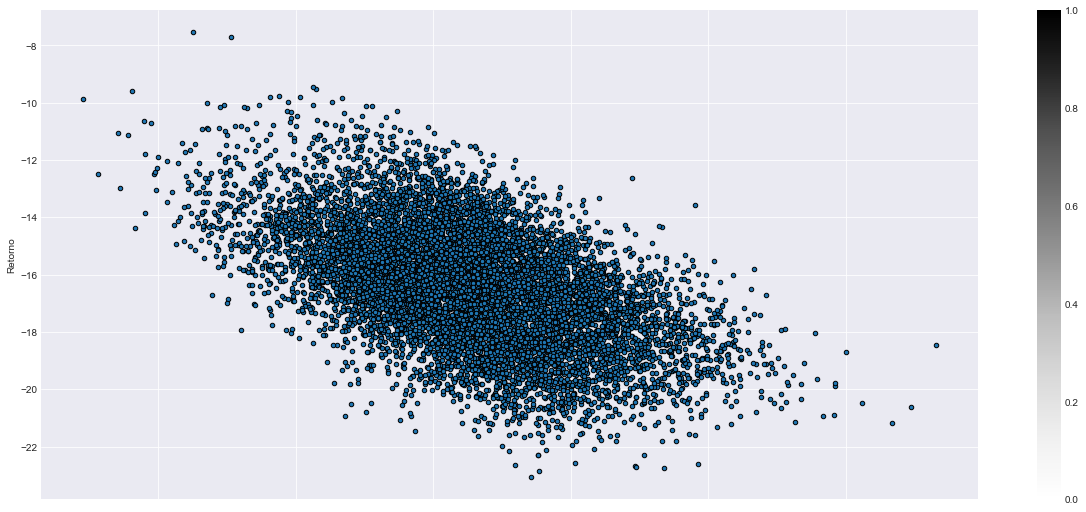

In [10]:
plt.style.use('seaborn-dark')
portifolios.plot.scatter(x='Volatilidade', y='Retorno', cmap='RdYlGn', edgecolors = 'black', figsize=(21,9), grid=True)

   ## Encontrando a carteira eficiente

In [11]:
returns = np.array(lista_retornos)
risk = np.array(lista_volatilidade)

In [12]:
returnRisk = returns / risk

In [13]:
returnRisk.max()

-6.972663285168802

In [14]:
# A funçaõ argmax() retorna o indice do maior valor do array

index = returnRisk.argmax()

In [15]:
index

419

In [20]:
lista_pesos[419] * 100

array([19.14029647,  3.45403677, 11.52133131,  2.8395412 ,  9.46247427,
        0.51700216, 53.06531782])

In [21]:
retornoEficiente = np.dot(lista_pesos[419], retorno_anual)
retornoEficiente 

-7.70690386790486

In [ ]:
plt.style.use('seaborn-dark')
portifolios.plot.scatter(x='Volatilidade', y='Retorno', cmap='RdYlGn', edgecolors = 'black', figsize=(21,9), grid=True)